In [1]:
# charger le module pandas
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

 # Partie 1 : Importation et traitement du fichier population
        

In [2]:
population = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\population.csv')

In [3]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [4]:
population.info

<bound method DataFrame.info of              Zone  Année     Valeur
0     Afghanistan   2013  32269.589
1     Afghanistan   2014  33370.794
2     Afghanistan   2015  34413.603
3     Afghanistan   2016  35383.032
4     Afghanistan   2017  36296.113
...           ...    ...        ...
1411     Zimbabwe   2014  13586.707
1412     Zimbabwe   2015  13814.629
1413     Zimbabwe   2016  14030.331
1414     Zimbabwe   2017  14236.595
1415     Zimbabwe   2018  14438.802

[1416 rows x 3 columns]>

In [5]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [6]:
population["Valeur"]= population["Valeur"]*1000                       # Valeur exprimée en nombre de personnes 

In [7]:
population.head()


,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [8]:


population_2017=population.loc[population['Année'] == 2017, :]   # sélectionner les données de 2017


In [9]:
population_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


# Partie 2 : Importation et traitement fichier aide_alimentaire

In [10]:
aide_alimentaire = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\aide_alimentaire.csv')

In [11]:
aide_alimentaire.head()                # le champs Pays bénéficiaire doit être renommé en Zone
                                       # les valeurs de l'aide alimentaire sont exprimées en tonnes 
    

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [12]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

# Partie 3 : Importation et traitement fichier sous_nutrition

In [13]:
sous_nutrition = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\sous_nutrition.csv')

In [14]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [15]:
sous_nutrition=sous_nutrition.dropna()   # enlever les lignes contenant nan

In [16]:
sous_nutrition_2017=sous_nutrition.loc[sous_nutrition['Année'] == "2016-2018", :]  # sélectionner l'année 2017

In [17]:
sous_nutrition_2017=sous_nutrition_2017.replace(["2016-2018"],["2017"])    #  remplacer 2016-2018 par 2017
sous_nutrition_2017=sous_nutrition_2017.replace("<0.1","0",regex=True)  # mise à 0 des valeurs="<0.1" dans le champs Valeur



In [18]:
sous_nutrition_2017.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [19]:
sous_nutrition_2017["Valeur"] = sous_nutrition_2017["Valeur"].astype("float")  # changer le type de Valeur en float
sous_nutrition_2017["Année"] = sous_nutrition_2017["Année"].astype("int64")# changer le type de Année en int64
sous_nutrition_2017['Valeur'] = sous_nutrition_2017['Valeur']*1000000  ## exprimer valeur en nombre de personnes 
                                                                      ## idem fichier population

In [20]:
sous_nutrition_2017.dtypes


Zone       object
Année       int64
Valeur    float64
dtype: object

In [21]:
population_sous_alim_2017 = pd.merge(population_2017, sous_nutrition_2017, on="Zone", how="outer")

In [22]:
population_sous_alim_2017.rename({'Valeur_x': 'nb_personnes', 'Valeur_y': 'nb_sous_alimentés','Année_x':'Année'}, axis=1, inplace=True)

In [23]:
population_sous_alim_2017.drop('Année_y', axis=1, inplace=True)     # supprime la colonne Année_y provenant du fichier sous_nutrition

# Partie 4 : Importation et traitement fichier dispo_alimentaire

In [24]:
dispo_alimentaire = pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\dispo_alimentaire.csv')

In [25]:
dispo_alimentaire.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

## REPONSES AUX QUESTIONS 


1.la proportion de personnes en état de sous-nutrition.

2.le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale 

3.idem pour la disponibilité alimentaire des produits végétaux 

4.l’utilisation de la disponibilité intérieure;en particulier la part qui est attribuée à l’alimentation animale 

5.La disponibilité intérieure perdue

6.La disponibilité intérieure utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions

7.Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

8.Production de céréales utilisée comme aliment pour Animaux Vs Nourriture

9.Etude du cas particulier du manioc en Thaïlande

10.les pays qui ont le plus bénificié d’aide depuis 2013

11.Pays qui ont le plus et le moins de disponibilité alimentaire/habitant.

12.Autres informations utiles pour mettre en relief les pays qui semblent être le plus en difficulté au niveau alimentaire

13.Carte de la disponibilité alimentaire de différents pays


  

### 1. la proportion de personnes en état de sous-nutrition 

In [26]:
population_sous_alim_2017.head()

,Zone,Année,nb_personnes,nb_sous_alimentés
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,NaN


In [27]:
ratio_sous_nutrition=round(((population_sous_alim_2017['nb_sous_alimentés'].sum()/population_sous_alim_2017['nb_personnes'].sum())*100),2)

In [28]:
print('la proportion de personnes en état de sous-nutrition est de ',ratio_sous_nutrition,"%" )

la proportion de personnes en état de sous-nutrition est de  7.1 %


### 2. le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale 

##### nb théorique personnes = disponibilite alimentaire totale/population mondiale     
#### on considère un besoin moyen journalier de 2500 Kcal/ personne/ jour
#### disponibilite alimentaire totale = somme(disponibilite alimentaire/ personne/jour par pays) * (nb personnes du pays) en Kcal /jr

In [29]:
dispo_alimentaire_pays=pd.merge(dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum(),population_2017,on="Zone", how="outer")

In [30]:
dispo_alimentaire_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur
0,Afghanistan,2087.0,2017.0,36296113.0
1,Afrique du Sud,3020.0,2017.0,57009756.0
2,Albanie,3188.0,2017.0,2884169.0
3,Algérie,3293.0,2017.0,41389189.0
4,Allemagne,3503.0,2017.0,82658409.0


In [31]:
dispo_alimentaire_pays['Kcal_tot_jour']=dispo_alimentaire_pays['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_pays['Valeur']

In [32]:
dispo_alimentaire_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False) 


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal_tot_jour
11,Autriche,3770.0,2017.0,8819901.0,3.325103e+10
16,Belgique,3737.0,2017.0,11419748.0,4.267560e+10
159,Turquie,3708.0,2017.0,81116450.0,3.007798e+11
171,États-Unis d'Amérique,3682.0,2017.0,325084756.0,1.196962e+12
74,Israël,3610.0,2017.0,8243848.0,2.976029e+10
...,...,...,...,...,...
233,Soudan du Sud,NaN,2017.0,10910763.0,NaN
234,Tchéquie,NaN,2017.0,10641034.0,NaN
235,Tokélaou,NaN,2017.0,1300.0,NaN
236,Tonga,NaN,2017.0,101998.0,NaN


In [33]:
Nbre_personnes= dispo_alimentaire_pays['Kcal_tot_jour'].sum()/2500  # disponibilité alimentaire mondiale 
                                                                    # divisé par besoin moyen kcal/jr 

In [34]:
print('le nombre théorique de personnes qui pourraient être nourries est de:',round(Nbre_personnes ,0),'personnes soit',round(((Nbre_personnes/population_2017['Valeur'].sum())*100),2) ,'% de la population mondiale actuelle')


le nombre théorique de personnes qui pourraient être nourries est de: 8367593851.0 personnes soit 110.86 % de la population mondiale actuelle


### 3. le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale des produits végétaux 

In [35]:
dispo_alimentaire_vegetale=dispo_alimentaire.loc[dispo_alimentaire['Origine'] == \
"vegetale",['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby(['Zone'])\
['Disponibilité alimentaire (Kcal/personne/jour)'].sum()


In [36]:
dispo_alimentaire_vegetale.head()

Zone
Afghanistan       1871.0
Afrique du Sud    2533.0
Albanie           2203.0
Algérie           2915.0
Allemagne         2461.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [37]:
dispo_alimentaire_vegetale=pd.merge(dispo_alimentaire_vegetale,population_2017,on="Zone", how="outer")

In [38]:
dispo_alimentaire_vegetale['Kcal_tot_jour']=dispo_alimentaire_vegetale['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_pays['Valeur']

In [39]:
dispo_alimentaire_vegetale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal_tot_jour
0,Afghanistan,1871.0,2017.0,36296113.0,6.791003e+10
1,Afrique du Sud,2533.0,2017.0,57009756.0,1.444057e+11
2,Albanie,2203.0,2017.0,2884169.0,6.353824e+09
3,Algérie,2915.0,2017.0,41389189.0,1.206495e+11
4,Allemagne,2461.0,2017.0,82658409.0,2.034223e+11


In [40]:
dispo_alimentaire_vegetale['Kcal_tot_jour'].sum()    # somme des disponibilites alimentaires 
                                                            # journalières dans le monde en Kcal/personne/jour

17260764211501.0

In [41]:
Nbre_personnes_vegetale= dispo_alimentaire_vegetale['Kcal_tot_jour'].sum()/2500   # 2500 kcal besoin moyen jour

In [42]:
print('le nombre théorique de personnes qui pourraient être nourries est de:',round(Nbre_personnes_vegetale ,0),'personnes soit',round(((Nbre_personnes_vegetale/population_2017['Valeur'].sum())*100),2) ,'% de la population mondiale actuelle')

le nombre théorique de personnes qui pourraient être nourries est de: 6904305685.0 personnes soit 91.47 % de la population mondiale actuelle


### 3bis . le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale des produits d'origine animale.

In [43]:
dispo_alimentaire_animale=dispo_alimentaire.loc[dispo_alimentaire['Origine'] == \
"animale",['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby(['Zone'])\
['Disponibilité alimentaire (Kcal/personne/jour)'].sum()

In [44]:
dispo_alimentaire_animale=pd.merge(dispo_alimentaire_animale,population_2017,on="Zone", how="outer")

In [45]:
dispo_alimentaire_animale['Kcal_tot_jour']=dispo_alimentaire_animale['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire_pays['Valeur']

In [46]:
dispo_alimentaire_animale.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal_tot_jour
0,Afghanistan,216.0,2017.0,36296113.0,7.839960e+09
1,Afrique du Sud,487.0,2017.0,57009756.0,2.776375e+10
2,Albanie,985.0,2017.0,2884169.0,2.840906e+09
3,Algérie,378.0,2017.0,41389189.0,1.564511e+10
4,Allemagne,1042.0,2017.0,82658409.0,8.613006e+10


In [47]:
dispo_alimentaire_animale['Kcal_tot_jour'].sum()

3658220415830.0

In [48]:
Nbre_personnes_animale= dispo_alimentaire_animale['Kcal_tot_jour'].sum()/2500

In [49]:
round(Nbre_personnes_animale,0)

1463288166.0

In [50]:
print('le nombre théorique de personnes qui pourraient être nourries est de:',round(Nbre_personnes_animale ,0),'personnes soit',round(((Nbre_personnes_animale/population_2017['Valeur'].sum())*100),2) ,'% de la population mondiale actuelle')

le nombre théorique de personnes qui pourraient être nourries est de: 1463288166.0 personnes soit 19.39 % de la population mondiale actuelle


### 4. la part de la disponibilité intérieure mondiale attribuée à l’alimentation animale.

In [51]:
print('l alimentation animale mondiale représente', dispo_alimentaire['Aliments pour animaux'].sum(), 'milliers de tonnes soit ',round((dispo_alimentaire['Aliments pour animaux'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la disponibilité alimentaire totale')

l alimentation animale mondiale représente 1304245.0 milliers de tonnes soit  13.24 % de la disponibilité alimentaire totale


### 5. perte totale de la disponibilité intérieure mondiale

In [52]:
print('La perte totale de la disponibilité intérieure mondiale représente', dispo_alimentaire['Pertes'].sum(),'milliers de tonnes soit ',round((dispo_alimentaire['Pertes'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la  disponibilité alimentaire totale.')

La perte totale de la disponibilité intérieure mondiale représente 453698.0 milliers de tonnes soit  4.61 % de la  disponibilité alimentaire totale.


### 6. la part de la disponibilité intérieure mondiale utilisée pour l'alimentation humaine

In [53]:
print('l alimentation humaine mondiale représente', dispo_alimentaire['Nourriture'].sum(), 'milliers de tonnes soit ',round((dispo_alimentaire['Nourriture'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la disponibilité alimentaire totale')

l alimentation humaine mondiale représente 4876258.0 milliers de tonnes soit  49.51 % de la disponibilité alimentaire totale


### 6bis. la part de la disponibilité intérieure mondiale attribuée aus semences,au traitement et aux autres utilisations.

In [54]:
print('la production de semences représente', dispo_alimentaire['Semences'].sum(), 'milliers de tonnes soit',round((dispo_alimentaire['Semences'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la disponibilité alimentaire totale')

la production de semences représente 154681.0 milliers de tonnes soit 1.57 % de la disponibilité alimentaire totale


In [55]:
print('la partie "Traitement" représente', dispo_alimentaire['Traitement'].sum(), 'milliers de tonnes soit',round((dispo_alimentaire['Traitement'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la disponibilité alimentaire totale')

la partie "Traitement" représente 2204687.0 milliers de tonnes soit 22.38 % de la disponibilité alimentaire totale


In [56]:
print('la partie "Autres Utilisations" représente', dispo_alimentaire['Autres Utilisations'].sum(), 'milliers de tonnes soit',round((dispo_alimentaire['Autres Utilisations'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2),'% de la disponibilité alimentaire totale')

la partie "Autres Utilisations" représente 865023.0 milliers de tonnes soit 8.78 % de la disponibilité alimentaire totale


In [57]:
part_nourriture=round((dispo_alimentaire['Nourriture'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2)
part_semence=round((dispo_alimentaire['Semences'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2)
part_alimentation_animale=round((dispo_alimentaire['Aliments pour animaux'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2)
part_traitement=round((dispo_alimentaire['Traitement'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2)
part_autres_utilisations=round((dispo_alimentaire['Autres Utilisations'].sum()/dispo_alimentaire['Disponibilité intérieure'].sum())*100,2)

Text(0.5, 0.98, 'Répartition de la disponibilité alimentaire totale')

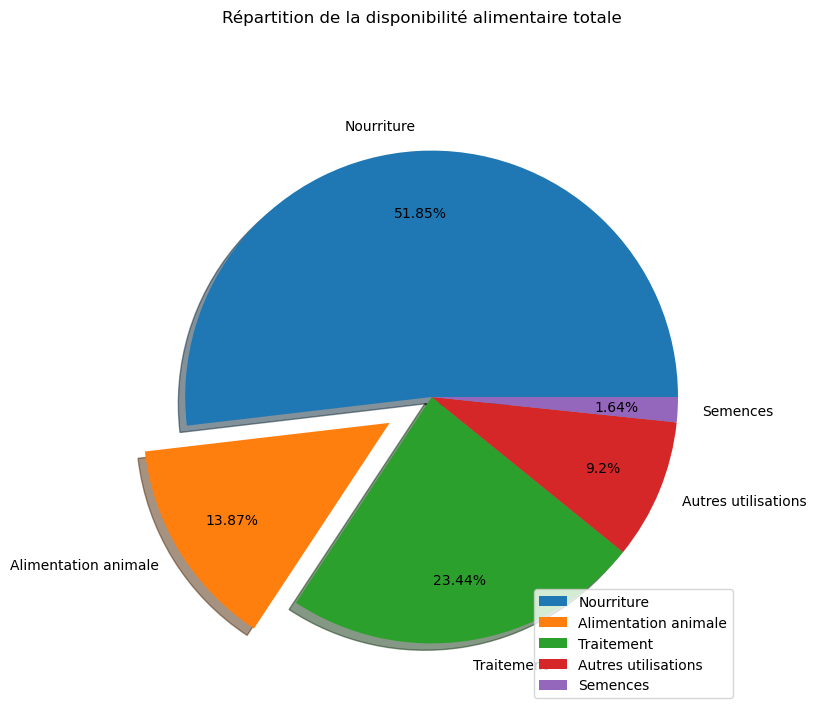

In [58]:

pyplot.figure(figsize = (8, 8))
x = [part_nourriture, part_alimentation_animale,part_traitement,part_autres_utilisations,part_semence]
pyplot.pie(x, labels = ['Nourriture', 'Alimentation animale', 'Traitement', 'Autres utilisations', 'Semences'],
           explode = [0, 0.2, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.75, labeldistance = 1.1,
           shadow = True)
pyplot.legend(loc = 'best' )
pyplot.suptitle('Répartition de la disponibilité alimentaire totale') 

### 7. les pays où la proportion de personnes sous-alimentées est la plus forte en 2017

In [59]:
population_sous_alim_2017['%_sous_nutrition'] =round(population_sous_alim_2017['nb_sous_alimentés']/population_sous_alim_2017['nb_personnes']*100,2)# calcul du pourcentage  2 décimales
population_sous_alim_2017=population_sous_alim_2017.dropna().sort_values(by='%_sous_nutrition', ascending=False)               # suppression lignes NAN et tri

In [60]:
population_sous_alim_2017.head()

,Zone,Année,nb_personnes,nb_sous_alimentés,%_sous_nutrition
87,Haïti,2017,10982366.0,5300000.0,48.26
181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
128,Madagascar,2017,25570512.0,10500000.0,41.06
122,Libéria,2017,4702226.0,1800000.0,38.28
119,Lesotho,2017,2091534.0,800000.0,38.25


### 8. Production de céréales utilisée comme aliment pour Animaux Vs Nourriture

In [61]:
dispo_alimentaire_cereale =dispo_alimentaire.loc[dispo_alimentaire['Produit'] == \
"Céréales, Autres",['Aliments pour animaux','Nourriture',"Production"]].sum()


In [62]:
print('la production mondiale de céréales réprésente',dispo_alimentaire_cereale["Production"],\
'milliers de tonnes dont :\n',dispo_alimentaire_cereale['Aliments pour animaux'],\
'milliers de tonnes pour l\'alimentation animale soit ',round((dispo_alimentaire_cereale['Aliments pour animaux']/dispo_alimentaire_cereale["Production"])*100,2),'% de la production et \n',dispo_alimentaire_cereale['Nourriture'],\
'milliers de tonnes pour l\'alimentation humaine soit',round((dispo_alimentaire_cereale['Nourriture']/dispo_alimentaire_cereale["Production"])*100,2),'% de la production')


la production mondiale de céréales réprésente 28412.0 milliers de tonnes dont :
 19035.0 milliers de tonnes pour l'alimentation animale soit  67.0 % de la production et 
 5324.0 milliers de tonnes pour l'alimentation humaine soit 18.74 % de la production


### 9. Etude du cas particulier du manioc en Thaïlande

In [63]:
dispo_alimentaire_pays.loc[dispo_alimentaire_pays['Zone']=='Thaïlande',:]

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal_tot_jour
153,Thaïlande,2785.0,2017.0,69209810.0,1.927493e+11


In [64]:
dispo_alimentaire_thailande_manioc=dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == \
"Thaïlande")& (dispo_alimentaire['Produit'] =="Manioc")]\
[['Zone','Produit','Production','Exportations - Quantité']]

In [65]:
dispo_alimentaire_thailande_manioc

,Zone,Produit,Production,Exportations - Quantité
13809,Thaïlande,Manioc,30228.0,25214.0


In [66]:
# besoin annuel en Kcal : nbre de personnes sous-nutrition X 365 jours X 2500 kcal (besoin énergétique moyen)

nb_sous_alimentés_thailande=population_sous_alim_2017.loc[population_sous_alim_2017["Zone"]=="Thaïlande"]['nb_sous_alimentés'].sum()

In [67]:
nb_sous_alimentés_thailande

6200000.0

#### La Thaïlande produit 30228 milliers de tonnes de manioc dont 25114 milliers partent à l exportation.Seule une petite partie ( 871 milliers de tonnes) est utilisée pour l alimentation humaine. D'autre part il y a 6.200.000 personnes en sous-nutrition.
### Combien de personnes pourrait-on nourrir avec cette quantité de manioc ?
100 grammes de manioc procurent 109 Kcal, 0,9 gr de protéines et 0,2 gr de lipides.

In [68]:
# multiplier par 1000 pour mettre en tonnes
# multiplier par 1000 pour mettre en kg
# multiplier par 1000 pour mettre en grammes
# multiplier 1.09 pour résultat en Kcal (1gr procure 1,09 kcal)
dispo_alimentaire_thailande_manioc['Kcal_manioc_exportation'] =\
dispo_alimentaire_thailande_manioc['Exportations - Quantité']*1000000000*1.09

In [69]:
dispo_alimentaire_thailande_manioc

,Zone,Produit,Production,Exportations - Quantité,Kcal_manioc_exportation
13809,Thaïlande,Manioc,30228.0,25214.0,2.748326e+13


In [70]:
Kcal_manioc_disponible =dispo_alimentaire_thailande_manioc ['Kcal_manioc_exportation'].sum()

In [71]:
print('L\'énergie du manioc Thaïlandais utilisé pour l\'exportation représente',format(Kcal_manioc_disponible,'.3e'),'Kcal')

L'énergie du manioc Thaïlandais utilisé pour l'exportation représente 2.748e+13 Kcal


In [72]:
print ('Une personne a besoin de 2500 kcal par jour soit', 2500*365,'Kcal par an')

Une personne a besoin de 2500 kcal par jour soit 912500 Kcal par an


In [73]:
print('le manioc exporté pourrait nourrir',round (Kcal_manioc_disponible/912500,0),"personnes pendant un an soit ",round(Kcal_manioc_disponible/(912500*nb_sous_alimentés_thailande),2),'fois la population en sous-nutrition en Thaïlande') 

le manioc exporté pourrait nourrir 30118641.0 personnes pendant un an soit  4.86 fois la population en sous-nutrition en Thaïlande


### 10. Pays qui ont reçu le plus d'aide alimentaire depuis 2013.

In [74]:
aide_alimentaire.loc[aide_alimentaire['Année'] < 2018,['Pays bénéficiaire','Valeur']].groupby('Pays bénéficiaire').sum()[['Valeur']].sort_values(by="Valeur", ascending=False)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
...,...
Égypte,1122
Vanuatu,802
Timor-Leste,116


### 11. Pays qui ont le plus et le moins de disponibilité alimentaire.

In [75]:
dispo_alimentaire_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True,)[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0


In [76]:
dispo_alimentaire_pays.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False,)[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0


 ### 11bis. Les 50  pays qui ont la plus forte disponibilité alimentaire

In [77]:
pays_sur_alim=dispo_alimentaire_pays.nlargest(50, 'Disponibilité alimentaire (Kcal/personne/jour)')[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

In [78]:
pays_sur_alim.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


### 11ter. Les 40 pays qui ont la plus faible disponibilité alimentaire

In [79]:
dispo_alimentaire_pays['Zone']=dispo_alimentaire_pays['Zone'].str.title()

In [80]:
pays_sous_alim=dispo_alimentaire_pays.nsmallest(40, 'Disponibilité alimentaire (Kcal/personne/jour)')[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]

In [81]:
pays_sous_alim.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République Centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République Populaire Démocratique De Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


### 12 Autres informations concernant la sous-nutrition dans certains pays

Comme la Thaïlande,de nombreux pays disposent de ressources alimentaires en quantité suffisante pour nourrir l'ensemble de leur population.Toutefois pour de multiples raisons, ces ressources sont utilisées pour d'autres usages ou mal réparties et il subsiste dans ces pays une partie de la population qui souffre de sous-nutrition malgré une disponibilite alimentaire /personne/jour supérieure au seuil fixé. 

In [82]:
dispo_alim_population_2017 = pd.merge(dispo_alimentaire_pays, population_sous_alim_2017, on='Zone', )
dispo_alim_population_2017.drop(['Valeur','Année_y','Kcal_tot_jour'], axis=1, inplace=True) 
dispo_alim_population_2017.rename({ 'Disponibilité alimentaire (Kcal/personne/jour)' : 'Kcal/personne/jour','Année_x': 'année','nb_personnes':'population'}, axis=1, inplace=True)

In [83]:
dispo_alim_population_2017=(dispo_alim_population_2017.loc[(dispo_alim_population_2017['nb_sous_alimentés']>0 )&  (dispo_alim_population_2017['Kcal/personne/jour']> 2500), :]).sort_values(by = 'nb_sous_alimentés', ascending = False)
dispo_alim_population_2017

,Zone,Kcal/personne/jour,année,population,nb_sous_alimentés,%_sous_nutrition
34,Indonésie,2776.0,2017.0,264650963.0,23600000.0,8.92
57,Nigéria,2700.0,2017.0,190873244.0,22800000.0,11.95
65,Philippines,2568.0,2017.0,105172925.0,15700000.0,14.93
35,Iraq,2542.0,2017.0,37552781.0,9000000.0,23.97
51,Mexique,3068.0,2017.0,124777324.0,8400000.0,6.73
54,Myanmar,2574.0,2017.0,53382523.0,7300000.0,13.67
82,Viet Nam,2744.0,2017.0,94600648.0,6500000.0,6.87
76,Thaïlande,2785.0,2017.0,69209810.0,6200000.0,8.96
83,Égypte,3518.0,2017.0,96442591.0,4600000.0,4.77
11,Burkina Faso,2717.0,2017.0,19193234.0,3600000.0,18.76


### 13. carte des pays disposant des plus basses et des plus hautes disponibilités alimentaires/Habitant

In [84]:
dispo_alimentaire_pays['Zone']=dispo_alimentaire_pays['Zone'].str.title()


In [85]:
dispo_alimentaire_pays.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Valeur,Kcal_tot_jour
0,Afghanistan,2087.0,2017.0,36296113.0,7.574999e+10
1,Afrique Du Sud,3020.0,2017.0,57009756.0,1.721695e+11
2,Albanie,3188.0,2017.0,2884169.0,9.194731e+09
3,Algérie,3293.0,2017.0,41389189.0,1.362946e+11
4,Allemagne,3503.0,2017.0,82658409.0,2.895524e+11


In [86]:
# charger un fichier avec les pays et les coordonnées longitude et latitude

countries=pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\exercices\\countries.csv') 

In [87]:
countries.head(5)
# le nom des pays est en anglais

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [88]:
# charger un fichier avec les pays en FR , US et les codes pays

pays=pd.read_csv('C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA ANALYST\\P4\\exercices\\pays.csv')

In [89]:
countries=countries.rename(columns={"country": "alpha1"})   # pour préparer la jointure 

In [90]:
pays.head(5)

,id,code,alpha1,alpha2,nom_fr,nom_us
0,1,4,AF,AFG,Afghanistan,Afghanistan
1,2,8,AL,ALB,Albanie,Albania
2,3,10,AQ,ATA,Antarctique,Antarctica
3,4,12,DZ,DZA,Algérie,Algeria
4,5,16,AS,ASM,Samoa Américaines,American Samoa


In [91]:
countries_full = pd.merge(pays, countries, on='alpha1')  # jointure sur champs alpha1

In [92]:
countries_full=countries_full.rename(columns={"nom_fr": "Zone"})   # pour préparer la jointure
countries_full.drop('name', axis=1, inplace=True)   # retirer colonne doublon nom de pays en us

In [93]:
country_rep=countries_full.loc[countries_full['alpha1']=='US', :] 

In [94]:
countries_full['Zone']=countries_full['Zone'].str.title()

In [95]:
countries_full.head()

,id,code,alpha1,alpha2,Zone,nom_us,latitude,longitude
0,1,4,AF,AFG,Afghanistan,Afghanistan,33.939110,67.709953
1,2,8,AL,ALB,Albanie,Albania,41.153332,20.168331
2,3,10,AQ,ATA,Antarctique,Antarctica,-75.250973,-0.071389
3,4,12,DZ,DZA,Algérie,Algeria,28.033886,1.659626
4,5,16,AS,ASM,Samoa Américaines,American Samoa,-14.270972,-170.132217


In [96]:
pays_sous_alim=pd.merge(pays_sous_alim, countries_full, on='Zone') # jointure sur champs zone
pays_sous_alim=pays_sous_alim.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "kcal"}) 

In [97]:
pays_sous_alim.head()   # liste des pays sous-alimentés avec les coordonnées 

,Zone,kcal,id,code,alpha1,alpha2,nom_us,latitude,longitude
0,République Centrafricaine,1879.0,40,140,CF,CAF,Central African,6.611111,20.939444
1,Zambie,1924.0,241,894,ZM,ZMB,Zambia,-13.133897,27.849332
2,Madagascar,2056.0,130,450,MG,MDG,Madagascar,-18.766947,46.869107
3,Afghanistan,2087.0,1,4,AF,AFG,Afghanistan,33.939110,67.709953
4,Haïti,2089.0,96,332,HT,HTI,Haiti,18.971187,-72.285215


In [98]:
pays_sur_alim['Zone']=pays_sur_alim['Zone'].replace('États-Unis d\'Amérique','États-Unis')
pays_sur_alim=pd.merge(pays_sur_alim, countries_full, on='Zone')
pays_sur_alim=pays_sur_alim.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "kcal"}) 

In [99]:
pays_sur_alim.loc[pays_sur_alim['Zone']=='États-Unis',:]

,Zone,kcal,id,code,alpha1,alpha2,nom_us,latitude,longitude
3,États-Unis,3682.0,231,840,US,USA,United States,37.09024,-95.712891


In [100]:
pays_sur_alim.head()

,Zone,kcal,id,code,alpha1,alpha2,nom_us,latitude,longitude
0,Autriche,3770.0,12,40,AT,AUT,Austria,47.516231,14.550072
1,Belgique,3737.0,18,56,BE,BEL,Belgium,50.503887,4.469936
2,Turquie,3708.0,220,792,TR,TUR,Turkey,38.963745,35.243322
3,États-Unis,3682.0,231,840,US,USA,United States,37.090240,-95.712891
4,Israël,3610.0,108,376,IL,ISR,Israel,31.046051,34.851612


In [101]:
import folium
coords = (25.539758, 2.430331)
map = folium.Map(location=coords, tiles=' CartoDB positron', zoom_start=2)  


In [102]:

for i in range(len(pays_sous_alim['Zone'])):
    folium.Marker(
        location = (pays_sous_alim['latitude'][i], pays_sous_alim['longitude'][i]),
        popup=pays_sous_alim['kcal'][i],
        min_zoom=2,
        max_zoom=4,
        icon=folium.Icon(color="red", icon="info-sign"),
 ).add_to(map)
for i in range(len(pays_sur_alim['Zone'])):
    folium.Marker(
        location = (pays_sur_alim['latitude'][i], pays_sur_alim['longitude'][i]),
        popup=pays_sur_alim['kcal'][i],
        min_zoom=2,
        max_zoom=4,
        icon=folium.Icon(color="green", icon="info-sign"),
).add_to(map)        
        

map.save(outfile='map.html')   #sauver dans un fichier htlm
map